In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gymnasium as gym
import mo_gymnasium as mo_gym
import numpy as np
import matplotlib.pyplot as plt
from gymnasium.wrappers.record_video import RecordVideo


env = mo_gym.make("deep-sea-treasure-v0")

In [3]:
env.observation_space

Box(0, 10, (2,), int32)

In [4]:
env.action_space

Discrete(4)

In [5]:
env.reward_space

d:\RL\PQL\.venv\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.reward_space to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.reward_space` for environment variables or `env.get_wrapper_attr('reward_space')` that will search the reminding wrappers.
  logger.warn(


Box([ 0. -1.], [23.7 -1. ], (2,), float32)

In [6]:
%cd "./morl-baselines-main/"
from morl_baselines.multi_policy.pareto_q_learning.pql import PQL

d:\RL\PQL\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


d:\RL\PQL\morl-baselines-main


In [7]:
GAMMA = 0.99

agent = PQL(
    env=env,
    ref_point=np.array([0, -50]),  # used to compute hypervolume
    gamma=GAMMA,
    log=False,  # use weights and biases to see the results!
)

d:\RL\PQL\.venv\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.reward_space to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.reward_space` for environment variables or `env.get_wrapper_attr('reward_space')` that will search the reminding wrappers.
  logger.warn(


In [8]:
agent.get_config()

{'env_id': 'deep-sea-treasure-v0',
 'ref_point': [0, -50],
 'gamma': 0.99,
 'initial_epsilon': 1.0,
 'epsilon_decay_steps': 100000,
 'final_epsilon': 0.1,
 'seed': None}

In [9]:
eval_env = mo_gym.make("deep-sea-treasure-v0") # environment used for evaluation
pcs = agent.train(total_timesteps=100000, eval_env=eval_env)

episode 0 ends
episode 100 ends
episode 200 ends
episode 300 ends
episode 400 ends
episode 500 ends
episode 600 ends
episode 700 ends
episode 800 ends
episode 900 ends
episode 1000 ends
episode 1100 ends
episode 1200 ends
episode 1300 ends
episode 1400 ends
episode 1500 ends
episode 1600 ends
episode 1700 ends
episode 1800 ends
episode 1900 ends
episode 2000 ends
episode 2100 ends
episode 2200 ends
episode 2300 ends
episode 2400 ends
episode 2500 ends
episode 2600 ends
episode 2700 ends
episode 2800 ends
episode 2900 ends
episode 3000 ends
episode 3100 ends
episode 3200 ends
episode 3300 ends
episode 3400 ends
episode 3500 ends
episode 3600 ends
episode 3700 ends
episode 3800 ends
episode 3900 ends
episode 4000 ends
episode 4100 ends
episode 4200 ends
episode 4300 ends
episode 4400 ends
episode 4500 ends
episode 4600 ends
episode 4700 ends
episode 4800 ends
episode 4900 ends
episode 5000 ends
episode 5100 ends
episode 5200 ends
episode 5300 ends
episode 5400 ends
episode 5500 ends
epis

In [10]:
pcs

{(0.699999988079071, -1.0),
 (8.03681981306076, -2.9701),
 (11.046854115, -4.90099501),
 (13.180722091614, -6.793465209301),
 (14.074187108950262, -7.72553055720799),
 (14.85618993228868, -8.64827525163591),
 (17.373143823765123, -12.247897700103202),
 (17.813676097383638, -13.12541872310217),
 (19.07265374771985, -15.705680661607312),
 (19.777976783050544, -17.383137616441328)}

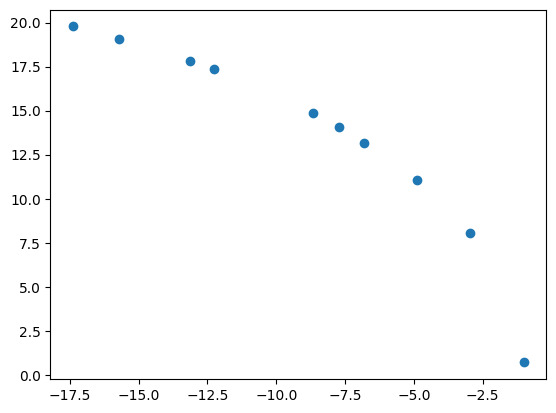

In [11]:
x = []
y = []

for point in pcs:
    x.append(point[0])
    y.append(point[1])

plt.plot(y, x, 'o')
plt.show()

In [14]:
env = mo_gym.make("deep-sea-treasure-v0", render_mode="rgb_array")
env = RecordVideo(env, "videos/demo", episode_trigger=lambda e: True)
vec = [0.7, -1]
agent.track_policy(vec, env)

d:\RL\PQL\.venv\lib\site-packages\gymnasium\wrappers\record_video.py:94: UserWarning: WARN: Overwriting existing videos at d:\RL\PQL\morl-baselines-main\videos\demo folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video d:\RL\PQL\morl-baselines-main\videos\demo\rl-video-episode-0.mp4.
Moviepy - Writing video d:\RL\PQL\morl-baselines-main\videos\demo\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\RL\PQL\morl-baselines-main\videos\demo\rl-video-episode-0.mp4


array([ 0.69999999, -1.        ])